# Loan Status with different models

In [2]:
# Introduction:
# In this kernel ,I will try to show you how different models can improve just by doing simple process on the data .

# we are going to work on binary classification problem, where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information . we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

# what you will learn in this kernel ?
# basics of visualizing the data .
# how to compare between feature importance (at less in this data) .

# feature selection

# feature engineer

# some simple techniques to process the data .
# handling missing data .
# how to deal with categorical and numerical data .
# outliers data detection
# but the most important thing that you will learn , is how to evaluate your model at every step you take .
# what we will use ?
# some important libraries like sklearn, matplotlib, numpy, pandas, seaborn, scipy
# fill the values using backward 'bfill' method for numerical columns , and most frequent value for categorical columns (simple techniques)
# 4 different models to train your data, so we can compare between them

# a) logistic regression

# b) KNeighborsClassifier

# C) SVC

# d) DecisionTreeClassifier

In [3]:
# Importing some important librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train_loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# we will change the type of Credit_History to object becaues we can see that it is 1 or 0

df['Credit_History'] = df['Credit_History'].astype('O')

In [8]:
# we will drop ID because it's not important for our model and it will just mislead the model

df.drop('Loan_ID', axis=1, inplace=True)

In [9]:
df.duplicated().any()

# we got no duplicated rows

False

The percentage of Y class : 0.69
The percentage of N class : 0.31


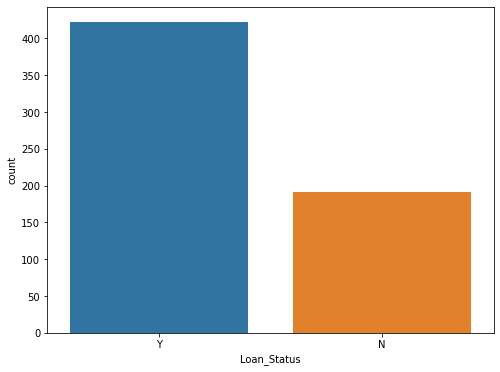

In [10]:
# let's look at the target percentage

plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status']);

print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

# We can consider it as imbalanced data, but for now i will not

In [11]:
#first we will go through the categorical features


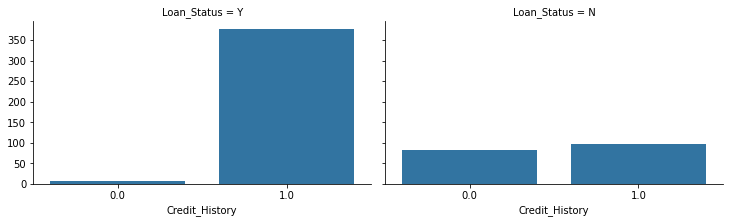

In [12]:
# Credit_History

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

# important feature

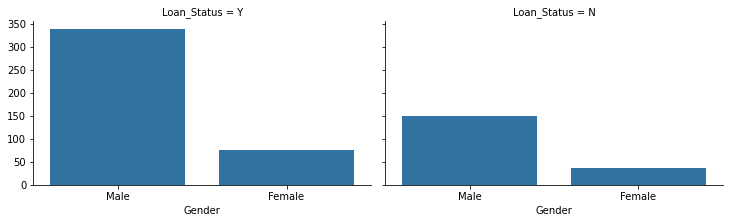

In [13]:
# Gender

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender');

# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

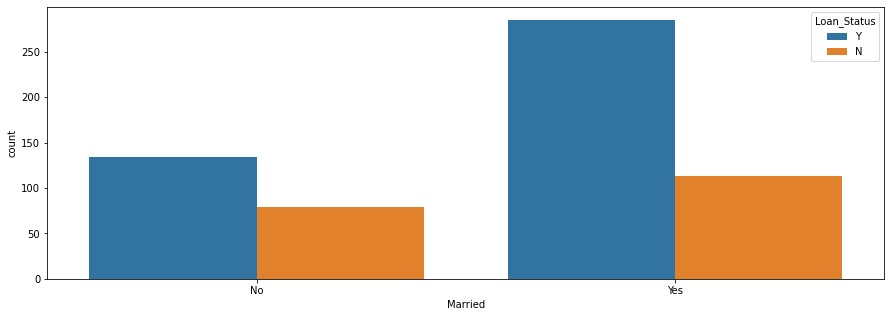

In [14]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=df);

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

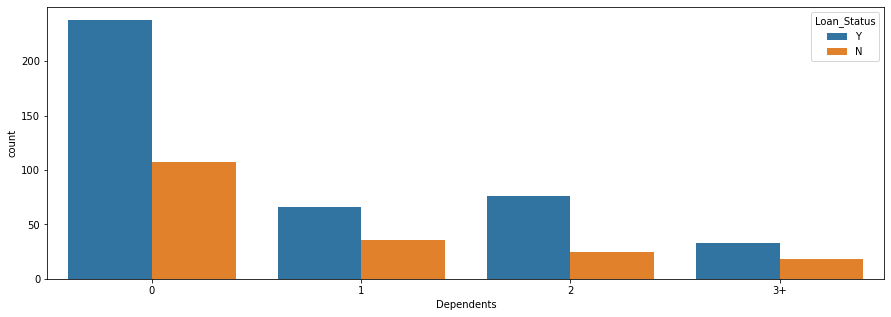

In [15]:
# Dependents

plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

# first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

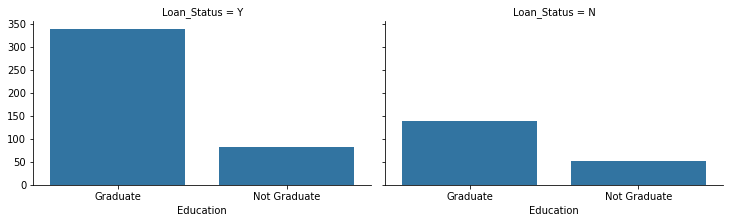

In [16]:
# Education

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education');

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

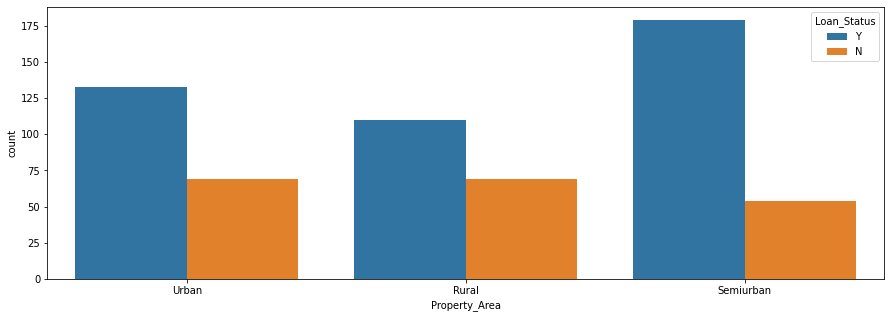

In [17]:
# Property_Area

plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

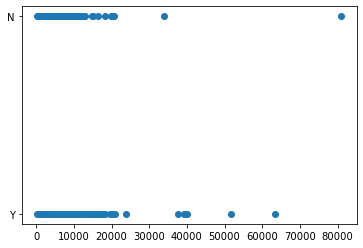

In [18]:
# ApplicantIncome

plt.scatter(df['ApplicantIncome'], df['Loan_Status']);

# No pattern

In [19]:
# the numerical data

df.groupby('Loan_Status').median() # median because Not affected with outliers

# we can see that when we got low median in CoapplicantInocme we got Loan_Status = N

# CoapplicantInocme is a good feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [20]:
# Simple process for the data

In [21]:
# Missing values
# Here i am just going to use a simple techniques to handle the missing data

df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [22]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [24]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [25]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [26]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [27]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() # no more missing data 

False

In [29]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [30]:
# num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() # no more missing data

False

In [31]:
# categorical columns¶ we are going to use LabelEncoder :

from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [32]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [33]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [34]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [35]:
df = pd.concat([cat_data, num_data, target], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [36]:
# Train the data
X = pd.concat([cat_data, num_data], axis=1)
y = target 

In [37]:
# we will use StratifiedShuffleSplit to split the data Taking into consideration that we will get the same ratio on the target column

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [49]:
# Decision Tree Algorithm tuning 
np.random.seed(42)

param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(DecisionTreeClassifier(random_state=42), cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 2, 'max_features': None}


In [52]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'gini', max_depth= 2, max_features= None,random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42) 
}

In [53]:
# build functions
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

In [54]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [57]:
import pickle
def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        
        # Creating a pickle file for the Multinomial Naive Bayes model
        filename = name
        pickle.dump(model, open(name+'.'+'pkl', 'wb'))
        
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
------------------------------
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
------------------------------
DecisionTreeClassifier :
  pre: 0.942
  rec: 0.422
  f1: 0.583
  loss: 6.542
  acc: 0.811
------------------------------
RandomForestClassifier :
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
------------------------------
